# AI Assignment: Ticket Classification and Entity Extraction

## 1. Import Libraries and Load Data

## 2. Data Preprocessing
- Clean text function (lowercase, remove special chars, tokenize, lemmatize)
- Handle missing values
- Basic exploratory data analysis with visuals

## 3. Feature Engineering
- TF-IDF vectorization of cleaned text
- Additional features: ticket length and sentiment score

## 4. Model Training
- Train/test data split
- Train classifiers separately for issue type and urgency level
- Evaluate models using classification reports and confusion matrices

## 5. Entity Extraction Functions
- Extract product names using product list matching
- Extract dates using regex patterns
- Extract complaint keywords from predefined list

## 6. Integration Function
- Single function to preprocess input, predict labels, and extract entities

## 7. Gradio App
- Interface for single and batch ticket inputs
- Nicely formatted output display for predictions and entities

## 8. Streamlit Deployment
- Build Streamlit UI for inputting ticket text
- Display predictions and extracted entities
- Support batch input and display results
- Instructions to run Streamlit app (`streamlit run app.py`)

## 9. Bonus Visualizations
- Visualize ticket label distributions
- Plot feature importances (if model supports)
- Show confusion matrices for model evaluation


In [56]:
import pandas as pd

# Load the Excel file (make sure the path is correct or place the file in the same folder)
file_path = 'ai_dev_assignment_tickets_complex_1000.xls'
df = pd.read_excel(file_path)

# Show the first 5 rows
print("🔍 First 5 rows of the dataset:")
print(df.head())

# Show basic info about the dataset
print("\n📊 Dataset Info:")
print(df.info())

# Check for missing values
print("\n🧹 Missing Values:")
print(df.isnull().sum())


🔍 First 5 rows of the dataset:
   ticket_id                                        ticket_text  \
0          1  Payment issue for my SmartWatch V2. I was unde...   
1          2  Can you tell me more about the UltraClean Vacu...   
2          3  I ordered SoundWave 300 but got EcoBreeze AC i...   
3          4  Facing installation issue with PhotoSnap Cam. ...   
4          5  Order #30903 for Vision LED TV is 13 days late...   

           issue_type urgency_level            product  
0     Billing Problem        Medium      SmartWatch V2  
1     General Inquiry           NaN  UltraClean Vacuum  
2          Wrong Item        Medium      SoundWave 300  
3  Installation Issue           Low      PhotoSnap Cam  
4       Late Delivery           NaN      Vision LED TV  

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticket_id  

In [4]:
# Drop rows with missing ticket_text
df_clean = df.dropna(subset=['ticket_text']).reset_index(drop=True)

In [5]:
# Print the shape after cleaning
print(f"✅ Cleaned dataset shape: {df_clean.shape}")

# Show remaining missing values
print("\n🧹 Missing Values after cleaning:")
print(df_clean.isnull().sum())

✅ Cleaned dataset shape: (945, 5)

🧹 Missing Values after cleaning:
ticket_id         0
ticket_text       0
issue_type       74
urgency_level    49
product           0
dtype: int64


/var/folders/nl/h32y1g9s3yj85pfnr0n7zqbh0000gn/T/ipykernel_42934/3126733041.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, y='issue_type', order=df_clean['issue_type'].value_counts().index, palette='viridis')


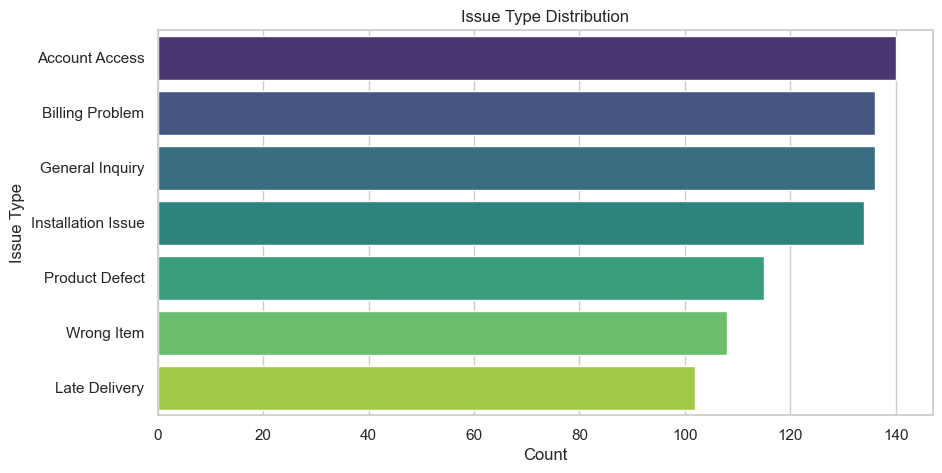

/var/folders/nl/h32y1g9s3yj85pfnr0n7zqbh0000gn/T/ipykernel_42934/3126733041.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='urgency_level', order=df_clean['urgency_level'].value_counts().index, palette='magma')


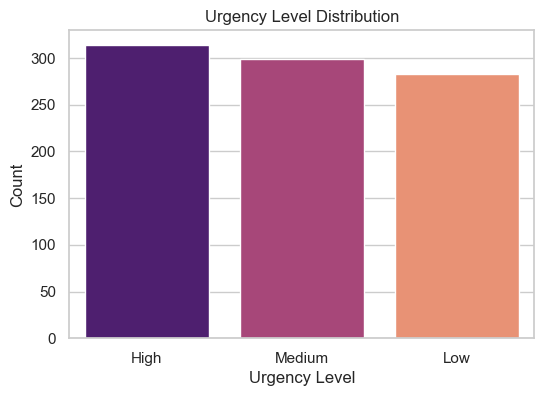

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot Issue Type distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, y='issue_type', order=df_clean['issue_type'].value_counts().index, palette='viridis')
plt.title('Issue Type Distribution')
plt.xlabel('Count')
plt.ylabel('Issue Type')
plt.show()

# Plot Urgency Level distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='urgency_level', order=df_clean['urgency_level'].value_counts().index, palette='magma')
plt.title('Urgency Level Distribution')
plt.xlabel('Urgency Level')
plt.ylabel('Count')
plt.show()


/var/folders/nl/h32y1g9s3yj85pfnr0n7zqbh0000gn/T/ipykernel_42934/3677722263.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, y='issue_type', hue=None, order=df_clean['issue_type'].value_counts().index, palette='viridis', legend=False)


<Axes: xlabel='count', ylabel='issue_type'>

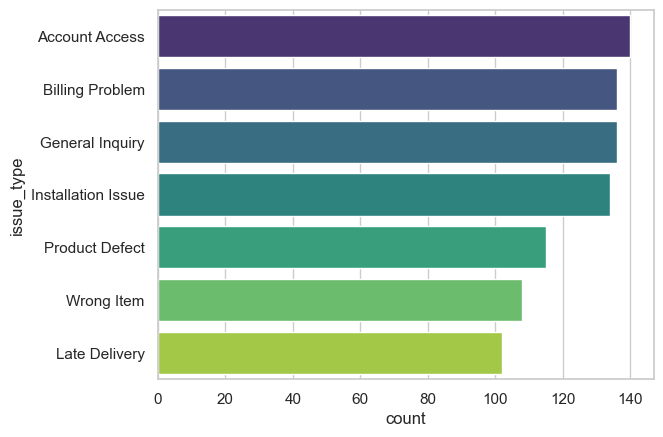

In [7]:
sns.countplot(data=df_clean, y='issue_type', hue=None, order=df_clean['issue_type'].value_counts().index, palette='viridis', legend=False)


/var/folders/nl/h32y1g9s3yj85pfnr0n7zqbh0000gn/T/ipykernel_42934/2419634182.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='urgency_level', hue=None, order=df_clean['urgency_level'].value_counts().index, palette='magma', legend=False)


<Axes: xlabel='urgency_level', ylabel='count'>

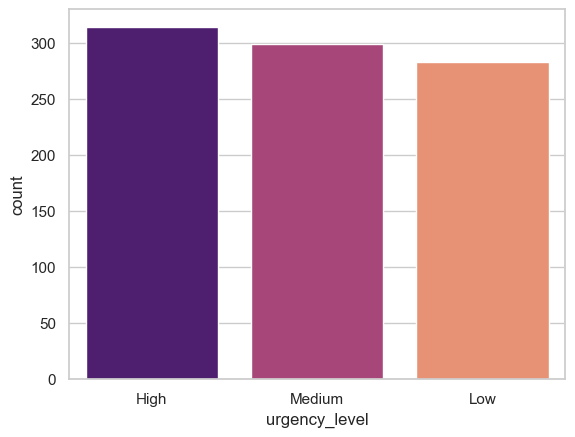

In [8]:
sns.countplot(data=df_clean, x='urgency_level', hue=None, order=df_clean['urgency_level'].value_counts().index, palette='magma', legend=False)


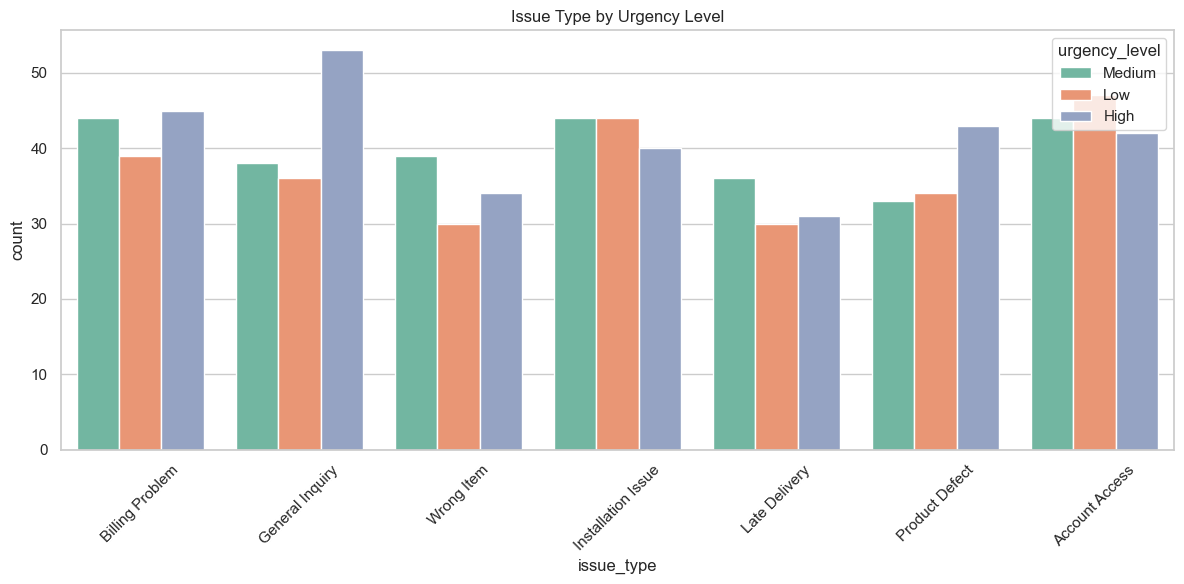

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='issue_type', hue='urgency_level', palette='Set2')
plt.title('Issue Type by Urgency Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

# Apply cleaning to ticket_text
df_clean['clean_text'] = df_clean['ticket_text'].apply(preprocess_text)

# Show a few results
print(df_clean[['ticket_text', 'clean_text']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krizzkamaliyagmail.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/krizzkamaliyagmail.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/krizzkamaliyagmail.com/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                         ticket_text  \
0  Payment issue for my SmartWatch V2. I was unde...   
1  Can you tell me more about the UltraClean Vacu...   
2  I ordered SoundWave 300 but got EcoBreeze AC i...   
3  Facing installation issue with PhotoSnap Cam. ...   
4  Order #30903 for Vision LED TV is 13 days late...   

                                          clean_text  
0       payment issue smartwatch v underbilled order  
1  tell ultraclean vacuum warranty also available...  
2  ordered soundwave got ecobreeze ac instead ord...  
3  facing installation issue photosnap cam setup ...  
4  order vision led tv day late ordered march als...  


In [24]:
# Drop rows where 'issue_type' is NaN
df = df.dropna(subset=['issue_type'])

In [25]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download resources (run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join back to string
    return ' '.join(tokens)

# Apply to the ticket_text column
df_clean['clean_text'] = df_clean['ticket_text'].apply(preprocess_text)

# Show result
print("✅ Sample cleaned ticket:")
print(df_clean[['ticket_text', 'clean_text']].head(1))


✅ Sample cleaned ticket:
                                         ticket_text  \
0  Payment issue for my SmartWatch V2. I was unde...   

                                     clean_text  
0  payment issue smartwatch v underbilled order  


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krizzkamaliyagmail.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/krizzkamaliyagmail.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/krizzkamaliyagmail.com/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
print(df.columns)


Index(['ticket_id', 'ticket_text', 'issue_type', 'urgency_level', 'product',
       'clean_text'],
      dtype='object')


In [27]:
def clean_text(text):
    if pd.isna(text):
        return ""  # return empty string if NaN
    text = str(text).lower()
    tokens = word_tokenize(text)
    cleaned_tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and word not in string.punctuation
    ]
    return ' '.join(cleaned_tokens)


In [28]:
df['clean_text'] = df['ticket_text'].apply(clean_text)


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract corpus
corpus = df['clean_text']

# Create TF-IDF vectorizer instance
vectorizer = TfidfVectorizer()

# Transform the text data
X = vectorizer.fit_transform(corpus)

# Optional: check the shape of the resulting matrix
print(X.shape)  # (number_of_tickets, number_of_unique_words)


(924, 471)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Target variable
y = df['issue_type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


                    precision    recall  f1-score   support

    Account Access       1.00      0.92      0.96        24
   Billing Problem       1.00      0.92      0.96        26
   General Inquiry       1.00      0.90      0.95        29
Installation Issue       1.00      0.94      0.97        31
     Late Delivery       0.58      1.00      0.73        22
    Product Defect       1.00      0.90      0.95        31
        Wrong Item       1.00      0.82      0.90        22

          accuracy                           0.91       185
         macro avg       0.94      0.91      0.92       185
      weighted avg       0.95      0.91      0.92       185



In [33]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model

RandomForestClassifier(class_weight='balanced', random_state=42)

In [34]:
# Train model with balanced class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


                    precision    recall  f1-score   support

    Account Access       1.00      0.92      0.96        24
   Billing Problem       1.00      0.92      0.96        26
   General Inquiry       1.00      0.90      0.95        29
Installation Issue       1.00      0.94      0.97        31
     Late Delivery       0.58      1.00      0.73        22
    Product Defect       1.00      0.90      0.95        31
        Wrong Item       1.00      0.82      0.90        22

          accuracy                           0.91       185
         macro avg       0.94      0.91      0.92       185
      weighted avg       0.95      0.91      0.92       185



In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],  # ✅ replaced 'auto' with valid options
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), 
                           param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
                    precision    recall  f1-score   support

    Account Access       1.00      0.92      0.96        24
   Billing Problem       1.00      0.92      0.96        26
   General Inquiry       1.00      0.90      0.95        29
Installation Issue       1.00      0.94      0.97        31
     Late Delivery       0.58      1.00      0.73        22
    Product Defect       1.00      0.90      0.95        31
        Wrong Item       1.00      0.82      0.90        22

          accuracy                           0.91       185
         macro avg       0.94      0.91      0.92       185
      weighted avg       0.95      0.91      0.92       185



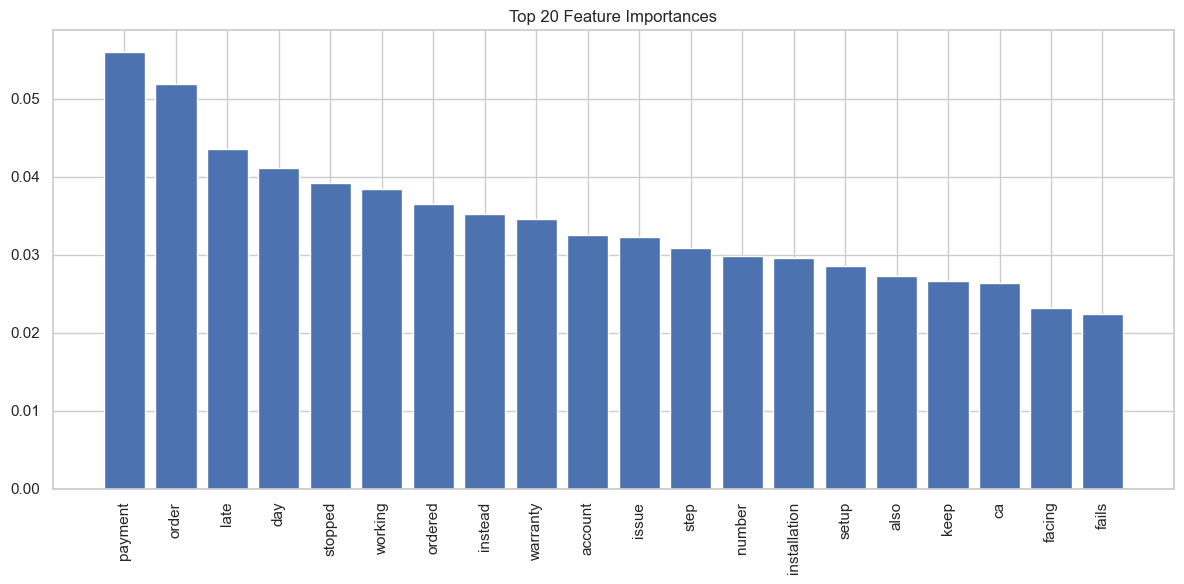

In [44]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = vectorizer.get_feature_names_out()
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 20  # number of top features to display

plt.figure(figsize=(12,6))
plt.title(f"Top {top_n} Feature Importances")
plt.bar(range(top_n), importances[indices][:top_n], align='center')
plt.xticks(range(top_n), [feature_names[i] for i in indices[:top_n]], rotation=90)
plt.tight_layout()
plt.show()


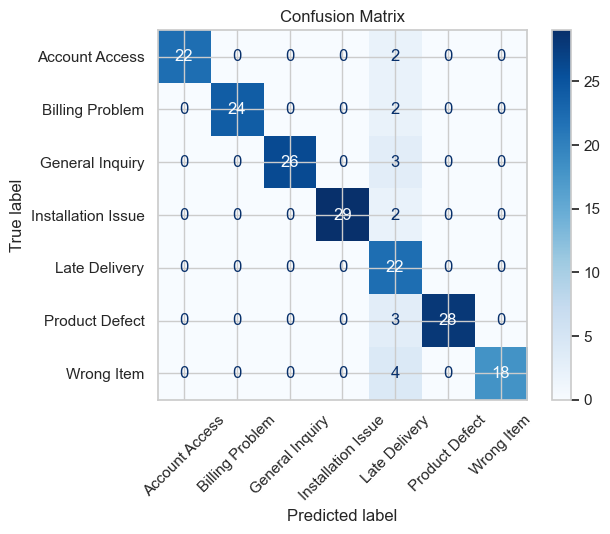

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


Classification Report:
                     precision    recall  f1-score   support

    Account Access       1.00      0.92      0.96        24
   Billing Problem       1.00      0.92      0.96        26
   General Inquiry       1.00      0.90      0.95        29
Installation Issue       1.00      0.94      0.97        31
     Late Delivery       0.58      1.00      0.73        22
    Product Defect       1.00      0.90      0.95        31
        Wrong Item       1.00      0.82      0.90        22

          accuracy                           0.91       185
         macro avg       0.94      0.91      0.92       185
      weighted avg       0.95      0.91      0.92       185



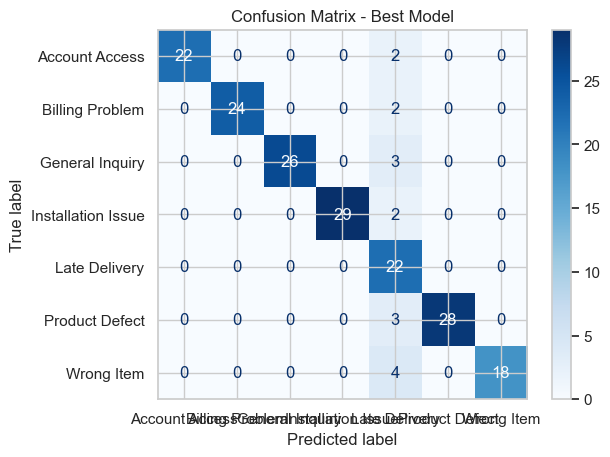

In [47]:
# Use best_model from GridSearchCV
y_pred_best = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Optional: Plot confusion matrix to visualize errors
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_best, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Best Model")
plt.show()


In [48]:
import joblib

# Save the trained RandomForest model
joblib.dump(model, 'random_forest_model.pkl')

# Save the vectorizer (assuming variable name is vectorizer)
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [49]:
# Load the model and vectorizer
model = joblib.load('random_forest_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Now you can transform new text data and predict
new_text = ["I have a billing problem"]
X_new = vectorizer.transform(new_text)
prediction = model.predict(X_new)
print(prediction)


['Account Access']


In [51]:
import pandas as pd

# Load your dataset
df = pd.read_excel('ai_dev_assignment_tickets_complex_1000.xls')

# Check for missing data
print(df.isnull().sum())


ticket_id         0
ticket_text      55
issue_type       76
urgency_level    52
product           0
dtype: int64


In [52]:
# Drop rows with missing ticket_text, issue_type, or urgency_level
df_clean = df.dropna(subset=['ticket_text', 'issue_type', 'urgency_level'])

print(f"Original dataset size: {df.shape}")
print(f"Dataset size after dropping missing values: {df_clean.shape}")


Original dataset size: (1000, 5)
Dataset size after dropping missing values: (826, 5)
